In [1]:
using FundamentalsNumericalComputation
FNC.init_format()

┌ Info: verify download of index files...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:139
┌ Info: reading database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:23
┌ Info: adding metadata...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:67
┌ Info: adding svd data...
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:69
┌ Info: writing database
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/download.jl:74
┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot /Users/driscoll/.julia/packages/MatrixDepot/GEDc3/src/MatrixDepot.jl:141


(section-krylov-subspace)=
# Krylov subspaces

The power and inverse iterations have a flaw that seems obvious once it is pointed out. Given a seed vector $\mathbf{u}$, they produce a sequence of vectors $\mathbf{u}_1,\mathbf{u}_2,\ldots$ that are scalar multiples of $\mathbf{u},\mathbf{A}\mathbf{u},\mathbf{A}^{2}\mathbf{u},\ldots$, but only the most recent vector is used to produce an eigenvector estimate. 

It stands to reason that we could do no worse, and perhaps much better, if we searched among all linear combinations of the vectors seen in the past. In other words, we seek a solution in the range (column space) of the matrix

:::{math}
:label: krylovmatrix
\mathbf{K}_m =
\begin{bmatrix}
  \mathbf{u} & \mathbf{A}\mathbf{u} & \mathbf{A}^{2} \mathbf{u} & \cdots & \mathbf{A}^{m-1} \mathbf{u}
\end{bmatrix}.
:::

```{index} ! Krylov matrix, ! Krylov subspace
```
::::{proof:definition} Krylov matrix and subspace
Given $n\times n$ matrix $\mathbf{A}$ and $n$-vector $\mathbf{u}$, the $m$th **Krylov matrix** is the $n\times m$ matrix {eq}`krylovmatrix`. The range (i.e., column space) of this matrix is the $m$th **Krylov subspace** $\mathcal{K}_m$.
::::

In general, we expect that the dimension of the Krylov[^kreeluv] subspace $\mathcal{K}_m$, which is the rank of $\mathbf{K}_m$, equals $m$, though it may be smaller.

[^kreeluv]: The proper pronunciation of "Krylov" is something like "kree-luv," but American English speakers often say "kreye-lahv." 

## Properties

As we have seen with the power iteration, part of the appeal of the Krylov matrix is that it can be generated in a way that fully exploits the sparsity of $\mathbf{A}$, simply through repeated matrix-vector multiplication. Furthermore, we have some important mathematical properties.

(theorem-subspace-krylovmult)=
::::{proof:theorem}
Suppose $\mathbf{A}$ is $n\times n$, $0<m<n$, and a vector $\mathbf{u}$ is used to generate Krylov subspaces. If $\mathbf{x}\in\mathcal{K}_m$, then the following hold:

1. $\mathbf{x} = \mathbf{K}_m \mathbf{z}$ for some $\mathbf{z}\in\mathbb{C}^m$.
2. $\mathbf{x} \in \mathcal{K}_{m+1}$.
3. $\mathbf{A}\mathbf{x} \in \mathcal{K}_{m+1}$.
::::

::::{proof:proof}

If $\mathbf{x}\in\mathcal{K}_m$, then for some coefficients $c_1,\ldots,c_m$,

:::{math}
\mathbf{x} = c_1 \mathbf{u} + c_2 \mathbf{A} \mathbf{u} + \cdots + c_m \mathbf{A}^{m-1} \mathbf{u}.
:::

Thus let $\mathbf{z}= \begin{bmatrix} c_1 & \cdots & c_m \end{bmatrix}^T$. Also $\mathbf{x}\in\mathcal{K}_{m+1}$, as we can add zero times $\mathbf{A}^{m}\mathbf{u}$ to the sum. Finally,
  
:::{math}
\mathbf{A}\mathbf{x} = c_1 \mathbf{A} \mathbf{u} + c_2 \mathbf{A}^{2} \mathbf{u} + \cdots + c_m \mathbf{A}^{m} \mathbf{u} \in \mathcal{K}_{m+1}.
:::
::::

## Dimension reduction

```{index} dimension reduction
```

The problems $\mathbf{A}\mathbf{x}=\mathbf{b}$ and $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$ are statements about a very high-dimensional space $\mathbb{C}^n$. One way to approximate them is to replace the full $n$-dimensional space with a much lower-dimensional $\mathcal{K}_m$ for $m\ll n$. This is the essence of the Krylov subspace approach.

For instance, we can interpret $\mathbf{A}\mathbf{x}_m\approx \mathbf{b}$ in the sense of linear least-squares—that is, using {numref}`Theorem %s <theorem-subspace-krylovmult>` to let $\mathbf{x}=\mathbf{K}_m\mathbf{z}$,

:::{math}
:label: gmresdef
\min_{\mathbf{x}\in\mathcal{K}_m} \|  \mathbf{A}\mathbf{x}-\mathbf{b} \|
= \min_{\mathbf{z}\in\mathbb{C}^m} \| \mathbf{A}(\mathbf{K}_m\mathbf{z})-\mathbf{b} \|
= \min_{\mathbf{z}\in\mathbb{C}^m} \| (\mathbf{A}\mathbf{K}_m)\mathbf{z}-\mathbf{b} \|.
:::

The natural seed vector for $\mathcal{K}_m$ in this case is the vector $\mathbf{b}$. In the next example we try to implement {eq}`gmresdef`. We do take one precaution: because the vectors $\mathbf{A}^{k}\mathbf{b}$ may become very large or small in norm, we normalize after each multiplication by $\mathbf{A}$, just as we did in the power iteration.

(demo-subspace-unstable)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

First we define a triangular matrix with known eigenvalues, and a random vector $b$.

In [2]:
λ = @. 10 + (1:100)
A = triu(rand(100,100),1) + diagm(λ)
b = rand(100);

Next we build up the first ten Krylov matrices iteratively, using renormalization after each matrix-vector multiplication.

In [3]:
Km = [b zeros(100,29)]
for m in 1:29      
    v = A*Km[:,m]
    Km[:,m+1] = v/norm(v)
end

Now we solve least-squares problems for Krylov matrices of increasing dimension, recording the residual in each case.

In [4]:
resid = zeros(30)
for m in 1:30  
    z = (A*Km[:,1:m])\b
    x = Km[:,1:m]*z
    resid[m] = norm(b-A*x)
end

The linear system approximations show smooth linear convergence at first, but the convergence stagnates after only a few digits have been found.

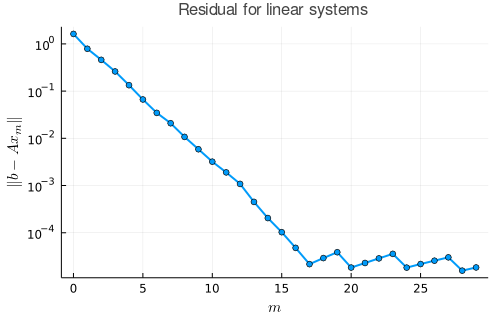

In [5]:
plot(0:29,resid,m=:o,
    xaxis=(L"m"),yaxis=(:log10,L"\| b-Ax_m \|"), 
    title="Residual for linear systems",leg=:none)

```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## The Arnoldi iteration

The breakdown of convergence in {numref}`Demo %s <demo-subspace-unstable>` is due to a critical numerical defect in our approach: the columns of the Krylov matrix {eq}`krylovmatrix` increasingly become parallel to the dominant eigenvector, as {eq}`poweriterconverge` predicts, and therefore to one another. As we saw in {numref}`section-leastsq-qr`, near-parallel vectors create the potential for numerical cancellation. This manifests as a large condition number for $\mathbf{K}_m$ as $m$ grows, eventually creating excessive error when solving the least-squares system.

The polar opposite of an ill-conditioned basis for $\mathcal{K}_m$ is an orthonormal one. Suppose we had a thin QR factorization of $\mathbf{K}_m$:

\begin{align*}
  \mathbf{K}_m  = \mathbf{Q}_m \mathbf{R}_m
  & =
  \begin{bmatrix}
    \mathbf{q}_1& \mathbf{q}_2 & \cdots & \mathbf{q}_m
  \end{bmatrix}
  \begin{bmatrix}
    R_{11} & R_{12} & \cdots & R_{1m} \\
    0 & R_{22} & \cdots & R_{2m} \\
    \vdots & & \ddots & \\
    0 & 0 & \cdots & R_{mm}
  \end{bmatrix}.
\end{align*}

Then the vectors $\mathbf{q}_1,\ldots,\mathbf{q}_m$ are the orthonormal basis we seek for $\mathcal{K}_m$. By {numref}`Theorem %s <theorem-subspace-krylovmult>`, we know that $\mathbf{A}\mathbf{q}_m \in \mathcal{K}_{m+1}$, and therefore

:::{math}
:label: arnoldivec
\mathbf{A} \mathbf{q}_m = H_{1m} \, \mathbf{q}_1 + H_{2m} \, \mathbf{q}_2 + \cdots + H_{m+1,m}\,\mathbf{q}_{m+1}
:::

for some choice of the $H_{ij}$. Note that by using orthonormality, we have

:::{math}
:label: arnoldiip
\mathbf{q}_i^* (\mathbf{A}\mathbf{q}_m) = H_{im},\qquad i=1,\ldots,m.
:::

Since we started by assuming that we know $\mathbf{q}_1,\ldots,\mathbf{q}_m$, the only unknowns in {eq}`arnoldivec` are $H_{m+1,m}$ and $\mathbf{q}_{m+1}$. But they appear only as a product, and we know that $\mathbf{q}_{m+1}$ is a *unit* vector, so they are uniquely defined (up to sign) by the other terms in the equation.

We can now proceed iteratively. 

```{index} ! Arnoldi iteration
```

::::{proof:algorithm} Arnoldi iteration
Given matrix $\mathbf{A}$ and vector $\mathbf{u}$:

1. Let $\mathbf{q}_1= \mathbf{u} \,/\, \| \mathbf{u}\|$.
2. For $m=1,2,\ldots$
    
    a. Use {eq}`arnoldiip` to find $H_{im}$ for $i=1,\ldots,m$.
    
    b. Let

    :::{math}
    :label: arnoldigs
    \mathbf{v} = (\mathbf{A} \mathbf{q}_m) - H_{1m} \,\mathbf{q}_1 - H_{2m}\, \mathbf{q}_2 - \cdots - H_{mm}\, \mathbf{q}_m.
    :::

    c. Let $H_{m+1,m}=\|\mathbf{v}\|$.
    
    d. Let $\mathbf{q}_{m+1}=\mathbf{v}\,/\,H_{m+1,m}$.

::::

The Arnoldi iteration finds nested orthonormal bases for a family of nested Krylov subspaces.

(demo-subspace-arnoldi)=
```{proof:demo}
```

```{raw} html
<div class='demo'>
```

```{raw} latex
%%start demo%%
```

We illustrate a few steps of the Arnoldi iteration for a small matrix.

In [6]:
A = rand(1.:9.,6,6)

6×6 Matrix{Float64}:
 1.0  7.0  1.0  9.0  2.0  8.0
 4.0  7.0  1.0  5.0  2.0  1.0
 1.0  7.0  9.0  9.0  5.0  8.0
 7.0  1.0  4.0  9.0  9.0  8.0
 7.0  4.0  3.0  9.0  4.0  1.0
 3.0  5.0  1.0  3.0  2.0  6.0

The seed vector we choose here determines the first member of the orthonormal basis.

In [7]:
u = randn(6)
Q = u/norm(u);

Multiplication by $\mathbf{A}$ gives us a new vector in $\mathcal{K}_2$.

In [8]:
Aq = A*Q[:,1];

We subtract off its projection in the previous direction. The remainder is rescaled to give us the next orthonormal column.

In [9]:
v = Aq - dot(Q[:,1],Aq)*Q[:,1]
Q = [Q v/norm(v)];

On the next pass, we have to subtract off the projections in two previous directions.

In [10]:
Aq = A*Q[:,2]
v = Aq - dot(Q[:,1],Aq)*Q[:,1] - dot(Q[:,2],Aq)*Q[:,2]
Q = [Q v/norm(v)];

At every step, $\mathbf{Q}_m$ is an ONC matrix.

In [11]:
@show opnorm( Q'*Q - I );

opnorm(Q' * Q - I) = 4.2302354693299417e-16


And $\mathbf{Q}_m$ spans the same space as the three-dimensional Krylov matrix.

In [12]:
K = [ u A*u A*A*u ];
@show rank( [Q K] );

rank([Q K]) = 3


```{raw} html
</div>
```

```{raw} latex
%%end demo%%
```

## Key identity

Up to now we have focused only on finding the orthonormal basis that lies in the columns of $\mathbf{Q}_m$. But the $H_{ij}$ values found during the iteration are also important. Taking $j=1,2,\ldots,m$ in {eq}`arnoldivec` leads to

:::{math}
:label: arnoldimat
\begin{split}
  \mathbf{A}\mathbf{Q}_m &= \begin{bmatrix}
    \mathbf{A}\mathbf{q}_1 & \cdots \mathbf{A}\mathbf{q}_m
  \end{bmatrix}\\
  & = \begin{bmatrix}
    \mathbf{q}_1 & \mathbf{q}_2 & \cdots & \mathbf{q}_{m+1}
  \end{bmatrix}\:  \begin{bmatrix}
    H_{11} & H_{12} & \cdots & H_{1m} \\
    H_{21} & H_{22} & \cdots & H_{2m} \\
    & H_{32} & \ddots & \vdots \\
    & & \ddots & H_{mm} \\
    & & & H_{m+1,m}
\end{bmatrix} = \mathbf{Q}_{m+1} \mathbf{H}_m,
\end{split}
:::

where the matrix $\mathbf{H}_m$ has a particular "triangular plus one" structure. 

```{index} ! upper Hessenberg matrix
```

::::{proof:definition} Upper Hessenberg matrix
A matrix $\mathbf{H}$ is **upper Hessenberg** if $H_{ij}=0$ whenever $i>j+1$.
::::

Equation {eq}`arnoldimat` is a fundamental identity of Krylov subspace methods.

## Implementation

(function-arnoldi)=
````{proof:function} arnoldi
**Arnoldi iteration for Krylov subspaces**

```{code-block} julia1
:lineno-start: 1
"""
    arnoldi(A,u,m)

Perform the Arnoldi iteration for `A` starting with vector `u`, out
to the Krylov subspace of degree `m`. Returns the orthonormal basis
(`m`+1 columns) and the upper Hessenberg `H` of size `m`+1 by `m`.
"""
function arnoldi(A,u,m)
    n = length(u)
    Q = zeros(n,m+1)
    H = zeros(m+1,m)
    Q[:,1] = u/norm(u)
    for j in 1:m
        # Find the new direction that extends the Krylov subspace.
        v = A*Q[:,j]
        # Remove the projections onto the previous vectors.
        for i in 1:j
            H[i,j] = dot(Q[:,i],v)
            v -= H[i,j]*Q[:,i]
        end
        # Normalize and store the new basis vector.
        H[j+1,j] = norm(v)
        Q[:,j+1] = v/H[j+1,j]
    end
    return Q,H
end
```
````

An implementation of the Arnoldi iteration is given in {numref}`Function {number} <function-arnoldi>`. A careful inspection shows that the loop starting at line 17 does not exactly implement {eq}`arnoldiip` and {eq}`arnoldigs`. The reason is numerical stability. Though the described and implemented versions are mathematically equivalent in exact arithmetic (see [Exercise 6](problem-subspace-modifiedgs)), the approach in {numref}`Function {number} <function-arnoldi>` is more stable.

In the next section we revisit the idea of approximately solving $\mathbf{A}\mathbf{x}=\mathbf{b}$ over a Krylov subspace $\mathcal{K}_m$, using the ONC matrix $\mathbf{Q}_m$ in place of $\mathbf{K}_m$. A related idea explored in [Exercise 7](problem-krylov-arnoldieig) is used to approximate the eigenvalue problem for $\mathbf{A}$, which is the approach that underlies `eigs` for sparse matrices.

## Exercises

(problem-krylovpermute)=
1. ✍ Let $\mathbf{A}=\displaystyle \begin{bmatrix}
    0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ 1 & 0 & 0 & 0
    \end{bmatrix}.$

    **(a)** Find the Krylov matrix $\mathbf{K}_3$ for the seed vector $\mathbf{u}=\mathbf{e}_1$. 

    **(b)** Find $\mathbf{K}_3$ for the seed vector $\mathbf{u}=\begin{bmatrix}1; \: 1;\: 1; \: 1\end{bmatrix}.$  

2. ⌨ For each matrix, make a table of the 2-norm condition numbers $\kappa(\mathbf{K}_m)$ for $m=1,\ldots,10$. Use a vector of all ones as the Krylov seed.

    **(a)** Matrix from {numref}`Demo %s <demo-subspace-unstable>`
    
    **(b)** $\begin{bmatrix}
      -2 & 1 & & &  \\
      1 & -2 & 1 & &  \\
      & \ddots & \ddots & \ddots & \\
      & & 1 & -2 & 1 \\
       & & & 1 & -2
     \end{bmatrix} \: (100\times 100)$

   **(c)** $\begin{bmatrix}
      -2 & 1 & & & 1 \\
      1 & -2 & 1 & &  \\
      & \ddots & \ddots & \ddots & \\
      & & 1 & -2 & 1 \\
      1 & & & 1 & -2
    \end{bmatrix} \:(200\times 200) $

    % must stay as #3
    (problem-subspace-matrixpolykrylov)=
3. ✍ Show that if $\mathbf{x}\in\mathcal{K}_m$, then $\mathbf{x}=p(\mathbf{A})\mathbf{u}$ for a polynomial $p$ of degree at most $m-1$. (See {eq}`matrixpoly` for applying a polynomial to a matrix.)

4. ✍ Compute the asymptotic flop requirements for {numref}`Function {number} <function-arnoldi>`. Assume that due to sparsity, a matrix-vector multiplication $\mathbf{A}\mathbf{u}$ requires only $c n$ flops for a constant $c$, rather than the usual $O(n^2)$. 

5. ⌨ When Arnoldi iteration is performed on the Krylov subspace generated using the matrix $\mathbf{A}=\displaystyle \begin{bmatrix}  2& 1& 1& 0\\ 1 &3 &1& 0\\ 0& 1& 3& 1\\ 0& 1& 1& 2 \end{bmatrix}$, the results can depend strongly on the initial vector $\mathbf{u}$. 

    **(a)** Apply {numref}`Function {number} <function-arnoldi>` and output `Q` and `H` when using the following seed vectors. 
    
    *(i)* `u=[1,0,0,0]` $\qquad$ *(ii)* `u=[1,1,1,1]` $\qquad$ *(iii)* `u=rand(4)`
   
    **(b)** Can you explain why case (ii) in part (a) cannot finish successfully? (Hint: What line(s) of the function can possibly return NaN when applied to finite values?) 

    % must stay as #6
    (problem-subspace-modifiedgs)=
6. ✍ As mentioned in the text, {numref}`Function {number} <function-arnoldi>` does not compute $H_{ij}$ as defined by {eq}`arnoldiip`, but rather 
  
    $$
    S_{ij} = \mathbf{q}_i^* ( \mathbf{A}\mathbf{q}_j - S_{1j}\,\mathbf{q}_1 - \cdots -
    S_{i-1,j}\,\mathbf{q}_{i-1} )
    $$

    for $i=1,\ldots,j$. Show that $S_{ij}=H_{ij}$. (Hence the function is mathematically equivalent to our Arnoldi formulas.)

    ```{index} eigenvalue
    ```
    % must stay as #7
    (problem-krylov-arnoldieig)=
7. One way to approximate the eigenvalue problem $\mathbf{A}\mathbf{x}=\lambda\mathbf{x}$ over $\mathcal{K}_m$ is to restrict $\mathbf{x}$ to the low-dimensional spaces $\mathcal{K}_m$. 
 
    **(a)** ✍ Show starting from {eq}`arnoldimat` that

    $$
    \mathbf{Q}_m^* \mathbf{A} \mathbf{Q}_m =  \tilde{\mathbf{H}}_m,
    $$

    where $\tilde{\mathbf{H}}_m$ is the upper Hessenberg matrix resulting from deleting the last row of $\mathbf{H}_m$. What is the size of this matrix? 

    **(b)** ✍ Show the reasoning above leads to the approximate eigenvalue problem $\tilde{\mathbf{H}}_m\mathbf{z} \approx \lambda\mathbf{z}$. (Hint: Start with $\mathbf{A}\mathbf{x} \approx \lambda\mathbf{x}$, and let $\mathbf{x}=\mathbf{Q}_m\mathbf{z}$ before applying part (a).)  

    **(c)** ⌨ Apply {numref}`Function {number} <function-arnoldi>` to the matrix of {numref}`Demo %s <demo-subspace-unstable>` using a random seed vector. Compute eigenvalues of $\tilde{\mathbf{H}}_m$ for $m=1,\ldots,40$, keeping track in each case of the error between the largest of those values (in magnitude) and the largest eigenvalue of $\mathbf{A}$. Make a log-linear graph of the error as a function of $m$.